# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season 1:winter, 2:spring, 3:summer, 4:fall
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [1]:
# Import the libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This line makes your charts appear inside the notebook
%matplotlib inline

# Load the CSV file
df = pd.read_csv("bike-sharing-hourly.csv")

# Look at the first few rows
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


There are 17 columns and 17,379 rows (hours).

There are no missing values (Non-Null = 17,379 for all).

Most variables are numeric (int or float).

The column dteday is text (we’ll convert it to a date next).

In [3]:
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The cnt column shows the total number of bikes rented per hour (on average ~190).

temp, atemp, hum, and windspeed are normalized between 0 and 1.

We can see the range of hourly rentals — some hours have almost no bikes, while others have more than 900.

In [4]:
df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values

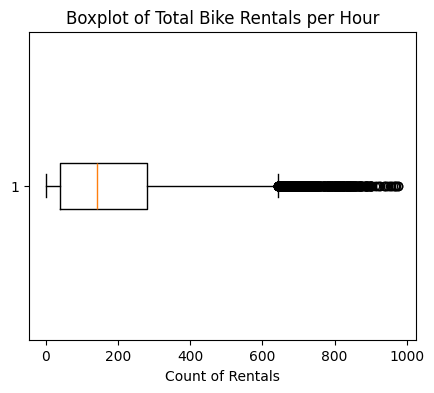

In [5]:
plt.figure(figsize=(5,4))
plt.boxplot(df["cnt"], vert=False)
plt.title("Boxplot of Total Bike Rentals per Hour")
plt.xlabel("Count of Rentals")
plt.show()

We can see some high values (above 800) that are rare but valid, these are just peak hours, not errors.
So there are no problematic outliers to remove.

In [6]:
df["date"] = pd.to_datetime(df["dteday"])


In [7]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["dayofweek"] = df["date"].dt.dayofweek  # 0 = Monday, 6 = Sunday

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,date,year,month,dayofweek
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,2011-01-01,2011,1,5
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,2011-01-01,2011,1,5
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,2011-01-01,2011,1,5
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,2011-01-01,2011,1,5
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,2011-01-01,2011,1,5


Converting the date lets us easily group by month, day, or weekday.
This will help us see patterns in usage across time.

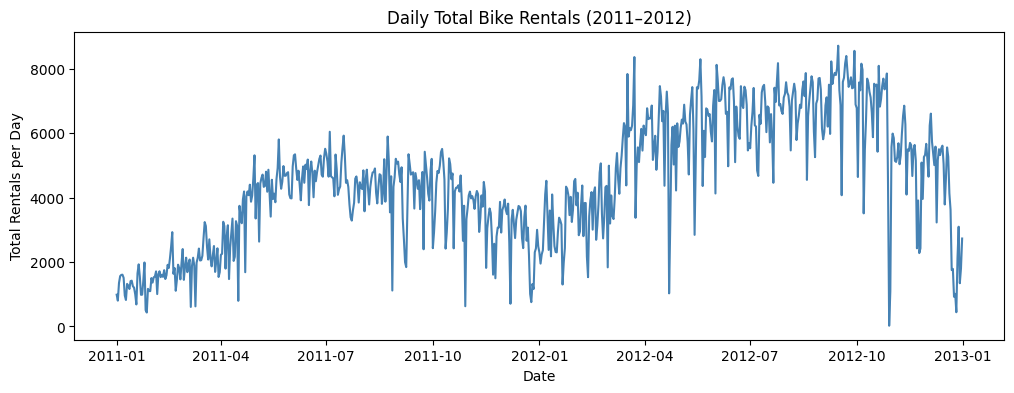

In [8]:
#Total Rentals over time

daily = df.groupby("dteday", as_index=False)["cnt"].sum()

plt.figure(figsize=(12,4))
plt.plot(pd.to_datetime(daily["dteday"]), daily["cnt"], color="steelblue")
plt.title("Daily Total Bike Rentals (2011–2012)")
plt.xlabel("Date")
plt.ylabel("Total Rentals per Day")
plt.show()

The graph shows clear seasonality — bike rentals rise in summer and decrease in winter.
2012 also shows slightly higher totals, meaning the service grew over time.

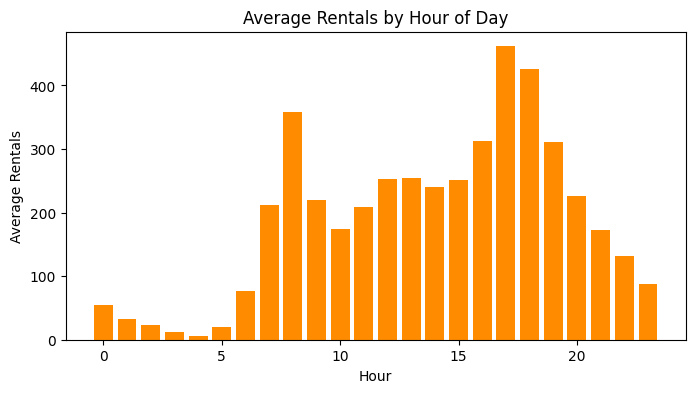

In [9]:
#Average Rentals by Hour of Day
hourly = df.groupby("hr")["cnt"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.bar(hourly["hr"], hourly["cnt"], color="darkorange")
plt.title("Average Rentals by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.show()

There are two main peaks: around 8 a.m. and 5–6 p.m. — this matches commuting times.
So the hour of the day is a very relevant feature for prediction.

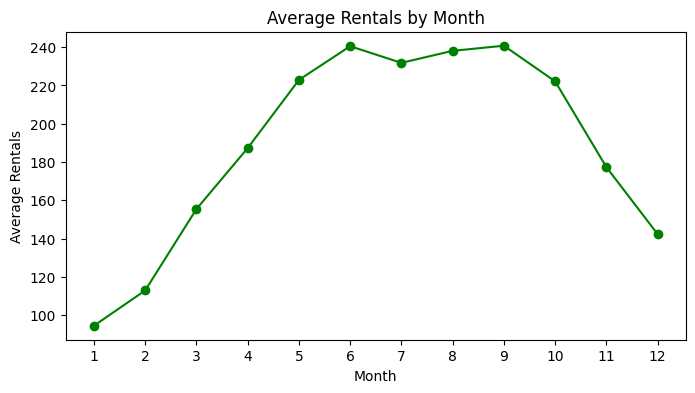

In [10]:
#Average Rental By Month
monthly = df.groupby("mnth")["cnt"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(monthly["mnth"], monthly["cnt"], marker="o", color="green")
plt.xticks(range(1,13))
plt.title("Average Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.show()

Rentals increase during warmer months (May–September) and drop in the colder months.
Therefore, month or season should be included as a predictor.

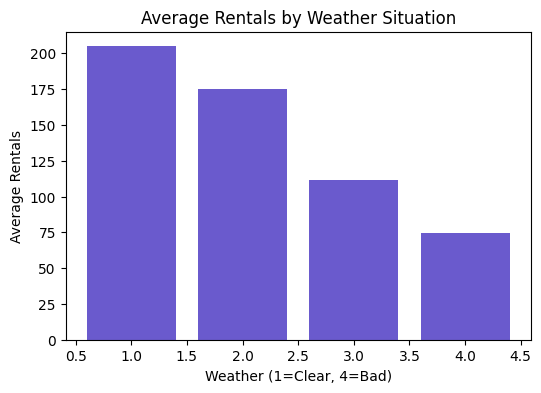

In [11]:
#Rental By Weather Condition
weather = df.groupby("weathersit")["cnt"].mean().reset_index()

plt.figure(figsize=(6,4))
plt.bar(weather["weathersit"], weather["cnt"], color="slateblue")
plt.title("Average Rentals by Weather Situation")
plt.xlabel("Weather (1=Clear, 4=Bad)")
plt.ylabel("Average Rentals")
plt.show()

Rentals are highest on clear days (1) and lowest during bad weather (3 or 4).
This makes “weathersit” an important predictor.

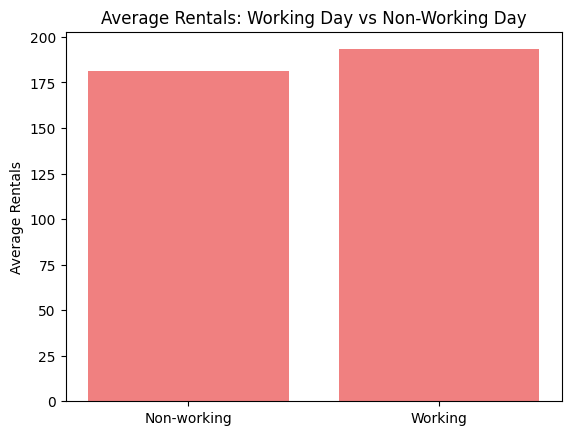

In [12]:
#Working vs Non-Working Day Rentals
workday = df.groupby("workingday")["cnt"].mean().reset_index()

plt.bar(workday["workingday"], workday["cnt"], color="lightcoral")
plt.xticks([0,1], ["Non-working", "Working"])
plt.title("Average Rentals: Working Day vs Non-Working Day")
plt.ylabel("Average Rentals")
plt.show()

People rent more on working days during commuting hours, while weekends have more midday usage.
The workingday variable will help capture this.

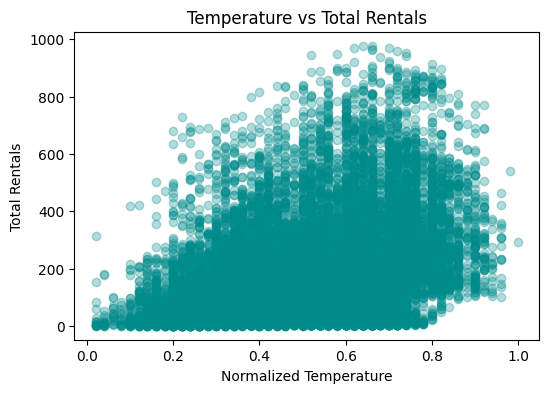

In [13]:
#Temperature vs Rentals
plt.figure(figsize=(6,4))
plt.scatter(df["temp"], df["cnt"], alpha=0.3, color="darkcyan")
plt.title("Temperature vs Total Rentals")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Rentals")
plt.show()

Warmer temperatures increase rentals up to a point — too cold or too hot reduces usage.
So temperature is a strong predictor.

In [14]:
#Feature Engineering

# Combine conditions logically
df["is_weekend"] = df["dayofweek"].isin([5,6]).astype(int)

# Approximate daylight hours (simplified)
df["daylight_hours"] = 12 + 3 * np.sin(2 * np.pi * (df["month"] - 3) / 12)

# Interaction features
df["temp_x_hum"] = df["temp"] * df["hum"]
df["temp_x_wind"] = df["temp"] * df["windspeed"]

df[["is_weekend", "daylight_hours", "temp_x_hum", "temp_x_wind"]].head()

,is_weekend,daylight_hours,temp_x_hum,temp_x_wind
0,1,9.401924,0.1944,0.0
1,1,9.401924,0.1760,0.0
2,1,9.401924,0.1760,0.0
3,1,9.401924,0.1800,0.0
4,1,9.401924,0.1800,0.0


is_weekend distinguishes weekends from weekdays.

daylight_hours estimates longer days in summer.

Multiplying features (like temp × humidity) captures combined effects.

Summary

Data is clean — no missing values or bad outliers.

Rentals depend strongly on:

Hour of day (commute peaks)

Season/month (summer higher)

Weather and temperature

Working day/weekend

Extra features like is_weekend and daylight_hours can improve prediction.

## PART II: Prediction Model

In [15]:
target = "cnt"
feature_cols = [
    # simple categorical-like integers
    "season","yr","mnth","hr","holiday","weekday","workingday",
    "weathersit",
    # numeric (already normalized 0–1)
    "temp","atemp","hum","windspeed",
    # basic date features we created
    "dayofweek","month"
]

In [16]:
#Time-aware split (train on 2011, test on 2012)
train_df = df[df["yr"] == 0].copy()   # 2011
test_df  = df[df["yr"] == 1].copy()   # 2012

X_train = train_df[feature_cols]
y_train = train_df[target]
X_test  = test_df[feature_cols]
y_test  = test_df[target]

X_train.shape, X_test.shape

((8645, 14), (8734, 14))

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# treat discrete integer codes as categorical
cat_cols = ["season","mnth","hr","holiday","weekday","workingday","weathersit","dayofweek","month"]
num_cols = ["yr","temp","atemp","hum","windspeed"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop"
)

pipe_lr = Pipeline([
    ("pre", preprocess),
    ("model", LinearRegression())
])

pipe_rf = Pipeline([
    ("pre", preprocess),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200))
])

In [18]:
#Train both models
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday', 'weathersit',
                                                   'dayofweek', 'month']),
                                                 ('num', StandardScaler(),
                                                  ['yr', 'temp', 'atemp', 'hum',
                                                   'windspeed'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [19]:
# Evaluate with simple metrics (RMSE, MAE, R²)
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X, y, name="model"):
    pred = model.predict(X)
    # handle (n,1) predictions just in case
    pred = np.ravel(pred)
    y    = np.ravel(y)

    # RMSE without using 'squared' kwarg
    rmse = np.sqrt(mean_squared_error(y, pred))
    mae  = mean_absolute_error(y, pred)
    r2   = r2_score(y, pred)
    return {"model": name, "RMSE": rmse, "MAE": mae, "R2": r2}

In [20]:
res_lr = evaluate(pipe_lr, X_test, y_test, "LinearRegression")
res_rf = evaluate(pipe_rf, X_test, y_test, "RandomForest(n_estimators=200)")
res_lr, res_rf

({'model': 'LinearRegression',
  'RMSE': 157.9943957361406,
  'MAE': 110.16121849215051,
  'R2': 0.4279806483145725},
 {'model': 'RandomForest(n_estimators=200)',
  'RMSE': 127.78589418102698,
  'MAE': 90.92980531475243,
  'R2': 0.6258091276739619})

Chosen: RandomForest


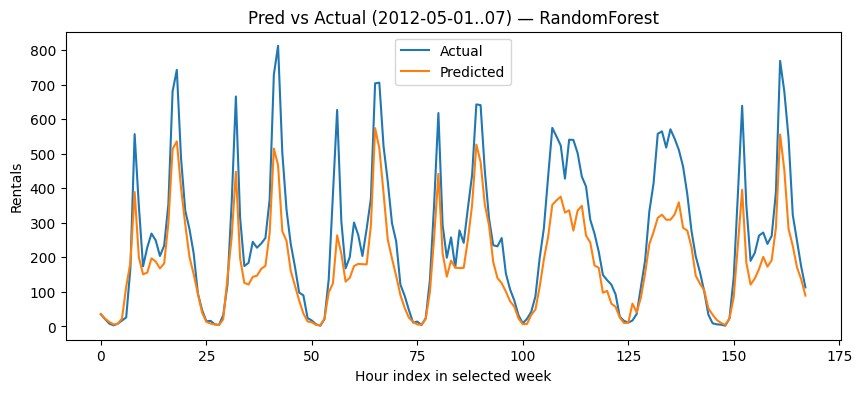

In [21]:
#Pick a winner
import matplotlib.pyplot as plt

best_model = pipe_rf if res_rf["R2"] >= res_lr["R2"] else pipe_lr
best_name  = "RandomForest" if best_model is pipe_rf else "LinearRegression"
print("Chosen:", best_name)

test_vis = test_df.copy()
test_vis["pred"] = best_model.predict(X_test)

# Pick a readable week
mask = (test_vis["dteday"] >= "2012-05-01") & (test_vis["dteday"] <= "2012-05-07")
week = test_vis.loc[mask].reset_index(drop=True)

plt.figure(figsize=(10,4))
plt.plot(week.index, week["cnt"], label="Actual")
plt.plot(week.index, week["pred"], label="Predicted")
plt.title(f"Pred vs Actual (2012-05-01..07) — {best_name}")
plt.xlabel("Hour index in selected week"); plt.ylabel("Rentals"); plt.legend()
plt.show()

## PART III: Streamlit dashboard

In [22]:
### This part goes in a separate script ###
df.to_csv("bike_hourly_with_features.csv", index=False)
